<a href="https://colab.research.google.com/github/Wpompeo/Wpompeo_DataScience/blob/master/Analisando_dados_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Analisando a Violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="80%" src="http://riofan.com.br/wp-content/uploads/2018/10/Imagens-do-Rio-de-Janeiro.jpg"></center>

A violência é algo que persiste em diversas cidades Brasileiras e cada vez mais se torna destaque em noticiários diários. 

Através das leis de acesso à informação e a conscientização dos orgãos públicos, alguns dados são disponibilizados para consulta.

O estado do *Rio de  Janeiro* utliza o [portal ISPDados](http://www.ispdados.rj.gov.br/) para divulgar alguns de seus dados abertos. 

Com isso, iremos realizar uma análise baseada nos dados estatísticos da violência no Rio, explorando algumas váriaveis fornecidas.


# Obtenção dos Dados

Os dados foram obtidos diretamente do portal *ISPDados*, onde se encontram alguns Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são geradas a partir de Registros de  Ocorrênica (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro e outras informações complementares de orgãos específicos da Policia Militar do Estado.

Todos os Dados publicados no ISP, passam por uma análise da Corregedoria Interna da Polícia Civil(COINPOL), para assim se manter uma qualidade.

As estatísticas produzidas baseiam-se na data em que foi confeccionado o (RO).

O *dataset* utilizado aqui, arquivo `csv`pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

# Importando os Dados


In [1]:
# Importa os pacotes necessários
import pandas as pd
import numpy as np

# Carrega arquivo
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

Com os dados carregados, vamos analisar algumas informações iniciais antes de explorarmos o nosso *dataset*. 

vamos analisar suas dimensões *variáveis* x *entradas*.

In [3]:
# Verificar o tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  56
Entradas:  344


Descoberta a dimensão dos dados que estamos trabalhando, vamos agora verificar quais são os tipos de dados que compõem esse dataset.

In [2]:
# Imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Com essas informações coletadas sobre o dataset, agora podemos analisar os tipos de cada variável que temos.

Essa informação é de bastante importância, e nos auxilia na limpeza dos dados desnecessários.

In [3]:
# Ver os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Todas as variáveis que estão presente no dataset são do tipo numérico, `int` e `float`.

Vamos conhecer como está organizado esse dataset, ver como é sua representação no arquivo.

In [4]:
# Ver as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Analisando as primeiras cinco entradas, percebemos que temos muitos dados ausentes, mas qual seria o motivo para termos a falta desses dados? 

Poderíamos sugerir algumas hipóteses para tentar entender essas ausências, e assim tentarmos contorná-las para continuar nossa exploração dos dados.



*   Nota-se que os dados tem seu inicio de registro no ano de 1991, o que é bastante tempo atrás.
Pode ser que esses dados não tenham sido contabilizados de maneira correta ou até mesmo na hora da coleta dessas informações para criação do dataset, essas informações podem ter sido registradas de maneira errada.
No Brasil essa cultura de dados de informação é algo que ainda não possui um bom controle, agora imagina isso no período do ano inicial do dataset. Esses dados estarem ausentes, não quer dizer que não existiram, até porque é dificil imaginar o mês de *janeiro* do ano de  1991 sem nenhum desses crimes ausentes no dataset.

Vamos analisar a proporção dos dados ausentes em relação à totalidade do dataset.



In [5]:
# Ver os valores faltantes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Analisando os dados acima, podemos ver que existem variáveis com valores faltantes em proporções muito acima. Como por exemplo: `apreensao_drogas` e `furtos_veiculos`.

Para realizarmos uma análise com maior eficaz, podemos analisar os dados a partir da data em que começaram a ser registrados.

# Informações Estatísticas da Violência no Rio de Janeiro

Utilizando o método `describe()`podemos visualizar a distribuição estatística do dataframe.

A utilização desse método, nos auxilia em algumas informações importantes para nossa ajuda.



*   Identificar outliers.
*   Entender melhor a distribuição dos dados.
*   Identificar falhas na distribuição dos dados.
*   Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.





In [6]:
# Imprimir o resultado estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Dados a serem analisados.

Vamos dedicar essa seção do projeto para analisarmos os dados em relação aos crimes de roubo e furto de veículos e residências.

Dois bens pessoais que a maioria dos cidadões batalham para conquistar. Nosso dataset possui dados sobre esses crimes, com isso conseguimos utilizar as informações para encontrarmos resultados pertinentes em relação à situação e tambem ao combate a esses crimes.

### Crimes Contra o Patrimônio - Veículos

Abaixo iremos analisar os crimes envolvendo roubo e furtos de veículos.

In [7]:
# Ver a média da variável roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo, 2))

2448.7


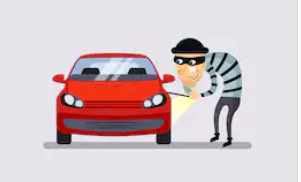

Acima, temos o resultado da média da variável de roubo de veículos: **2448.7** veículos por mês.

In [8]:
# Ver a média da variável furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos, 2))

1674.67


A relação de furto de veículos, possui números menores, mas ainda muito significativos, causando danos ao cidadão carioca. Em média são registrados **1674.67** furtos de veículos por mês.

In [9]:
# Ver a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculos,2))

1772.24


O número da média de veículos recuperados é **1772.24**, parece ser um número alto, mas comparando com a média de roubos **2448.7**, podemos concluir que muitos cidadões ainda ficam no prejuízo.

In [10]:
# Total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de veículos perdidos por mês: {:.2f}'.format(total))
print('Veículos recuperados por mês: {:.2f}'.format(mean_recuperacao_veiculos))

# Porcentagem de veículos recuperados
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))


Média de veículos perdidos por mês: 4123.37
Veículos recuperados por mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


Acima temos a representação dos valores mensais de algumas variáveis:

 Média de `veículos perdidos por mês:` **4123.37**.

Média de `veículos recuperados por mês:`**1772.24**.

Percentual de `recuperação de veículos roubados ou furtados`: **42.98%**.





In [20]:
# Valores min e max de roubo_veiculos
min_roubo_veic = df.roubo_veiculo.min()
max_roubo_veic = df.roubo_veiculo.max()

# Imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_roubo_veic))
print("Max:\t{}".format(max_roubo_veic))

Min:	1097
Max:	5358


O menor valor mensal, registrado de roubo de veículos é de **1097**.

Enquanto o maior valor é de **5358**. Vamos verificar em quais meses e anos esses dados foram registrados.

In [21]:
# Verificando ano e mês com menor número de roubos a veículos.
df[df.roubo_veiculo == 1097]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3


Acima podemos ver que o mês de **fevereiro** de 1991 é o mês com o menor número de registros de roubo de veículos.

In [22]:
# Verificando ano e mês com o maior número de roubos a veículos
df[df.roubo_veiculo == 5358]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3


Acima verificamos que o mês de **março** de 2018 é o mês com maior número de registros de roubos de veículos.

### Visualização dos Dados de Roubos e Furtos de Veículos

Histogramas são excelentes ferramentas de visualização, nos auxiliam a entender melhor os valores de distribuição em uma variável.

Vamos visualizar a variável roubo_veiculo no histograma abaixo.

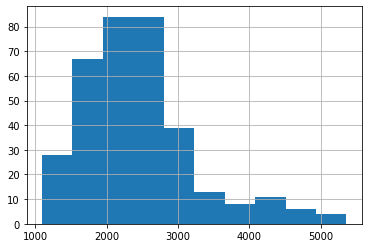

In [23]:
# Plotar histograma de roubo_veiculo
df.roubo_veiculo.hist();

Analisando o gráfico acima, podemos concluir algumas informações:

* Em mais de **80** meses os números de roubos de veículos registrados, ficaram entre 2000-2800 registros.

* E algo em torno de **5** meses com registros entre 5000-5500.

Vamos analisar essa mesma variável em um gráfico de linhas.

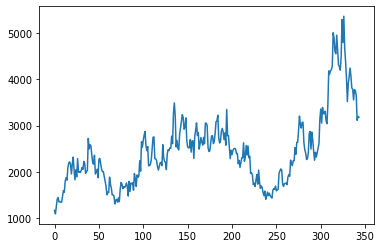

In [24]:
# Plotar gráfico de linhas para roubo_veiculo
df.roubo_veiculo.plot();

Como já tinhamos visto na extração dos dados anteriormente, o número de roubo de veículos só aumentou em relação ao inicio da coleta dos dados do dataset.

Atualmente teve uma queda nesse número, mas nada muito perto dos valores iniciais.

### Crimes Contra o Patrimônio - Residências

Agora iremos analisar a variável de roubos a residências.

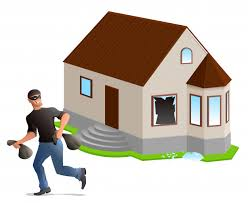

In [14]:
# Valores min e max de roubo_residencia
min_roubo_resid = df.roubo_residencia.min()
max_roubo_resid = df.roubo_residencia.max()

# Imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_roubo_resid))
print("Max:\t{}".format(max_roubo_resid))

Min:	49
Max:	300


Acima podemos ver que o menor valor de registro dentro de um mês, foi igual a **49** e o maior valor de registro foi de **300**.

Vamos verificar anos e meses desses dados.

In [15]:
# Verificando ano e mês com menor número de roubos a residencias
df[df.roubo_residencia == 49]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
313,2017,2,503,4.0,26,85.0,452,2521,324.0,170.0,848.0,277,49,4286,452,2260,487,0,4.0,551.0,3.0,11.0,4.0,1330,9714,1310,663,167.0,527.0,39.0,3089,5795,0.0,49.0,8.0,717.0,1266,372.0,808.0,120.0,2307,2396.0,535.0,882.0,82.0,1409.0,236.0,39,1.0,1.0,0.0,618,3298,4286,31231.0,3


*Fevereiro* de **2017** foi o ano com o menor registros de roubos a residências registrados no nosso dataset.

In [16]:
# Verificando ano e mês com maior número de roubos a residências
df[df.roubo_residencia == 300]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
13,1992,2,691,NaN,27,NaN,184,3413,NaN,NaN,NaN,613,300,1877,200,967,426,28,NaN,NaN,NaN,NaN,NaN,139,4550,2236,937,NaN,NaN,NaN,3713,6886,NaN,NaN,NaN,NaN,154,NaN,NaN,NaN,917,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,718,1393,1877,NaN,3


 Também temos o mês de *fevereiro* de **1992** como o ano de maior registro de roubos a residências no nosso dataset.

### Visualização dos Dados de Roubos a Residências

Vamos visualizar a variável `roubo_residencia` no histograma abaixo.

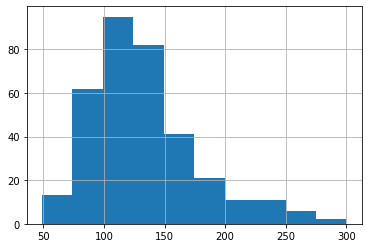

In [18]:
# Plotar histograma de roubo_residencia
df.roubo_residencia.hist();

Podemos verificar algumas informações interessantes no histograma acima:

* Mais de **80** meses com o número de roubos em residências entre 100-125.


* Menos de **5** meses com 300 registros de roubos a residências.






Vamos analisar essa mesma variável em um gráfico de linhas.

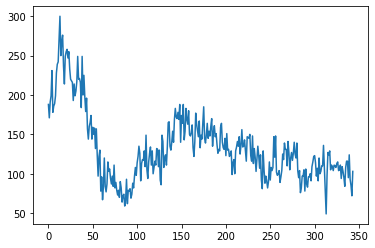

In [19]:
# Plotar gráfico de linhas para roubo_residências
df.roubo_residencia.plot();

Através do grafico de linhas acima, podemos concluir que o número de roubos a residências vem diminuindo desde o inicio de coletas de dados do nosso dataset.

Conclusão

Os dados coletados referentes a violência na cidade do Rio de Janeiro, nos deram uma excelente noção dos números reais dos crimes cometidos na cidade.

Percebeu se o quanto o cidadão fica vulnerável a esses tipos de crimes e como é muito importante termos um controle sobre esses dados, para pudermos analisar as variáveis registradas e estudarmos uma solução para a diminuição destes tipos de crimes.